In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt
import os.path

O Cenário anterior tinha o problema dos comboios muito compridos. Limitei o fluxo a 1980 veículos/hora em cada sentido. Comboios de no máximo 22 carros por faixa.

In [2]:
scenarios_folder = os.path.expanduser('~/Developer/interscsimulator/mock-simulators/smart_city_model/')
dr_events_filename_template = scenarios_folder + '{}/events.xml'

In [3]:
def parse_arrivals(filename, prefix=''):
    tree = ET.parse(filename)
    root = tree.getroot()

    events = []
    for child in root:        
        if child.attrib['type'] == 'arrival' and (len(prefix) == 0 or (prefix in child.attrib['person'])):
            # Sample arrival event:
            # <event time="918" type="arrival" person="paraiso5_79" vehicle="paraiso5_79" 
            #     link="40" legMode="car" trip_time="205" distance="2825" action="ok"/>

            trip_time = int(child.attrib['trip_time'])
            distance = int(child.attrib['distance'])

            events.append({'trip_time_s': trip_time, 'distance_m': distance})

    return pd.DataFrame(events)

In [5]:
dfs = []
scenarios = [
    'peak_cet_0_0', 
    'peak_dr-manual_0_0', 
    'peak_dr-manual_1_0', 
    'peak_dr-manual_1_18', 
]

for s in scenarios:
    dr = parse_arrivals(dr_events_filename_template.format(s))
    dr['avg_speed_km/h'] = 3.6 * dr['distance_m'] / dr['trip_time_s']
    dr = dr.drop(columns='distance_m')
    dfs.append(dr)
    
df = pd.concat(dfs, axis=1, keys=scenarios)
df.describe()

peak_cet_0_0                peak_dr-manual_0_0                 \
       trip_time_s avg_speed_km/h        trip_time_s avg_speed_km/h   
count  5426.000000    5426.000000        5426.000000    5426.000000   
mean    526.508109      19.021897         595.561555      16.751579   
std      85.880466       2.833300          82.210619       2.531853   
min     325.000000      13.560000         297.000000      10.812315   
25%     459.000000      16.872598         540.000000      15.362538   
50%     530.000000      18.524590         592.000000      16.462500   
75%     597.750000      20.749234         654.750000      17.824060   
max     750.000000      29.824047         877.000000      32.700965   

      peak_dr-manual_1_0                peak_dr-manual_1_18                 
             trip_time_s avg_speed_km/h         trip_time_s avg_speed_km/h  
count        5426.000000    5426.000000         5408.000000    5408.000000  
mean         1146.900663      10.252206          728.355954      19.366574  
std           500.628511       4.362541          341.369872      14.565600  
min           297.000000       3.839028          191.000000       6.886275  
25%           781.250000       6.150414          567.000000       9.039466  
50%           858.000000      11.641993          678.000000      14.890190  
75%          1541.750000      12.971939         1049.000000      17.297851  
max          2470.000000      32.700965         1377.000000      49.646073

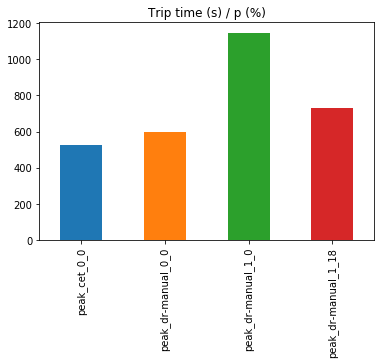

In [6]:
df.xs('trip_time_s', axis=1, level=1).mean().plot(kind='bar', title='Trip time (s) / p (%)')

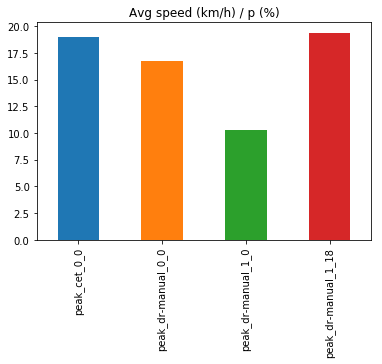

In [7]:
df.xs('avg_speed_km/h', axis=1, level=1).mean().plot(kind='bar', title='Avg speed (km/h) / p (%)')

Text(0.5,0.98,'Trip time distributions / p')

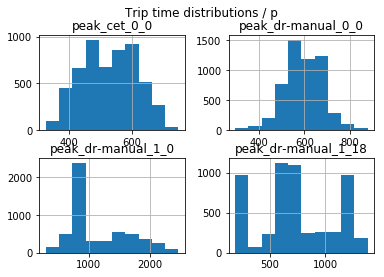

In [8]:
df.xs('trip_time_s', axis=1, level=1).hist()
plt.suptitle('Trip time distributions / p')

Text(0.5,0.98,'Trip time distributions / p')

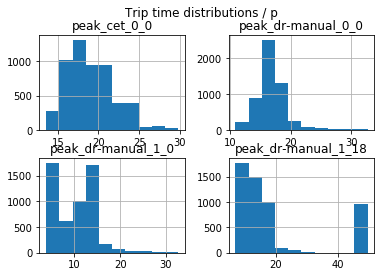

In [9]:
df.xs('avg_speed_km/h', axis=1, level=1).hist()
plt.suptitle('Trip time distributions / p')

In [10]:
dfs = []
scenarios = [
    'peak_cet_0_0', 
    'peak_dr-manual_0_0', 
    'peak_dr-manual_1_0', 
    'peak_dr-manual_1_18', 
]

for s in scenarios:
    dr = parse_arrivals(dr_events_filename_template.format(s), 'regular')
    dr['avg_speed_km/h'] = 3.6 * dr['distance_m'] / dr['trip_time_s']
    dr = dr.drop(columns='distance_m')
    dfs.append(dr)
    
df = pd.concat(dfs, axis=1, keys=scenarios)
df.describe()

peak_cet_0_0                peak_dr-manual_0_0                 \
       trip_time_s avg_speed_km/h        trip_time_s avg_speed_km/h   
count  5426.000000    5426.000000        5426.000000    5426.000000   
mean    526.508109      19.021897         595.561555      16.751579   
std      85.880466       2.833300          82.210619       2.531853   
min     325.000000      13.560000         297.000000      10.812315   
25%     459.000000      16.872598         540.000000      15.362538   
50%     530.000000      18.524590         592.000000      16.462500   
75%     597.750000      20.749234         654.750000      17.824060   
max     750.000000      29.824047         877.000000      32.700965   

      peak_dr-manual_1_0                peak_dr-manual_1_18                 
             trip_time_s avg_speed_km/h         trip_time_s avg_speed_km/h  
count        5426.000000    5426.000000         4448.000000    4448.000000  
mean         1146.900663      10.252206          843.010117      12.834859  
std           500.628511       4.362541          260.018564       4.191127  
min           297.000000       3.839028          301.000000       6.886275  
25%           781.250000       6.150414          652.000000       8.281572  
50%           858.000000      11.641993          709.000000      14.110714  
75%          1541.750000      12.971939         1145.000000      15.503049  
max          2470.000000      32.700965         1377.000000      32.388535

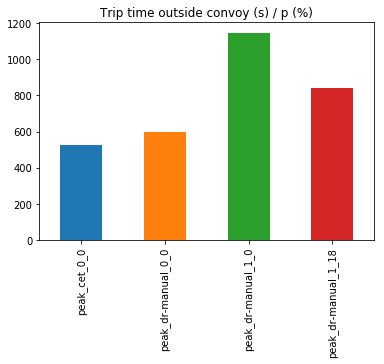

In [11]:
df.xs('trip_time_s', axis=1, level=1).mean().plot(kind='bar', title='Trip time outside convoy (s) / p (%)')

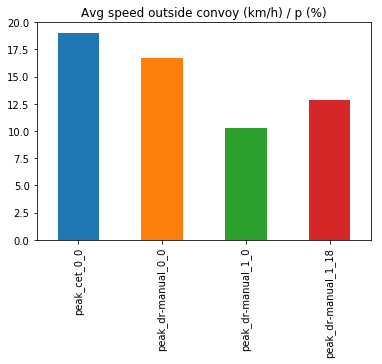

In [12]:
df.xs('avg_speed_km/h', axis=1, level=1).mean().plot(kind='bar', title='Avg speed outside convoy (km/h) / p (%)')

Text(0.5,0.98,'Trip time distributions outside convoy / p')

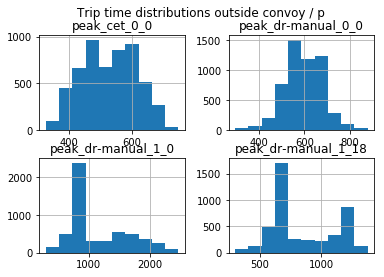

In [13]:
df.xs('trip_time_s', axis=1, level=1).hist()
plt.suptitle('Trip time distributions outside convoy / p')

Text(0.5,0.98,'Avg speed distributions outside convoy / p')

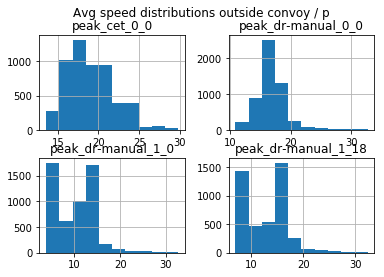

In [14]:
df.xs('avg_speed_km/h', axis=1, level=1).hist()
plt.suptitle('Avg speed distributions outside convoy / p')